# PROJECT 4: Dengue Cases in the Philippines (2016–2020) Linear Regression🦟

# **ANALYST:** Rhealyn Vasquez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue_df = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue_df['Month'] = dengue_df['Month'].astype('category')
dengue_df['Year'] = dengue_df['Year'].astype(int)
dengue_df['Region'] = dengue_df['Region'].astype('category')
dengue_df['Dengue_Cases'] = dengue_df['Dengue_Cases'].astype(float)
dengue_df['Dengue_Deaths'] = dengue_df['Dengue_Deaths'].astype(float)
dengue_df['Date'] = pd.to_datetime(
    dengue_df['Year'].astype(str) + '-' + dengue_df['Month'].astype(str) + '-01',
    errors='coerce'
)

# PREDICTION USING LINEAR REGRESSION

#  Which regions in the Philippines are projected to have the highest dengue cases in 2021?

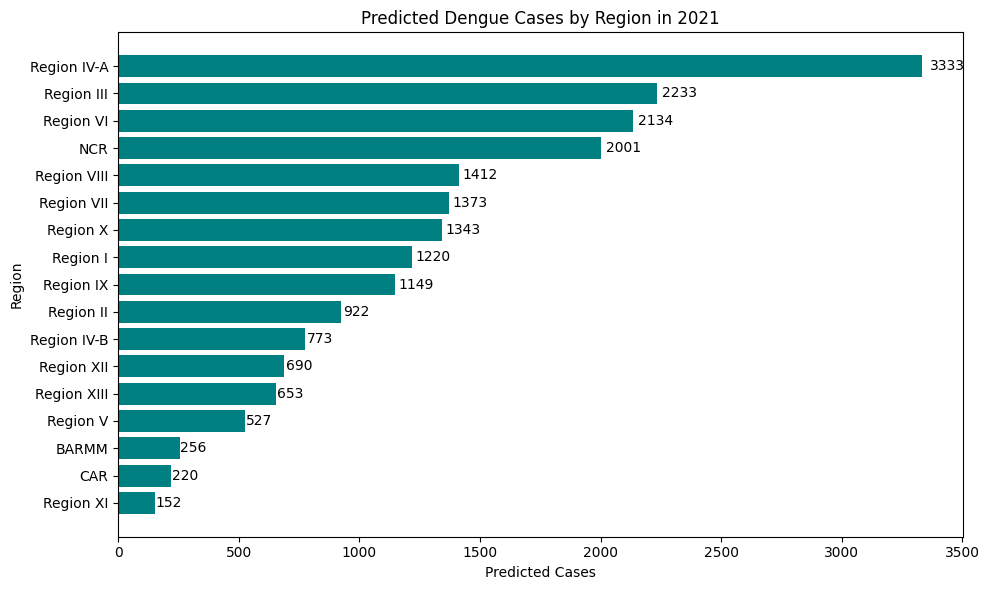

In [4]:
regions = dengue_df['Region'].unique()
predictions = []

for region in regions:
    data = dengue_df[dengue_df['Region'] == region]
    X = data[['Year']]
    y = data['Dengue_Cases']
    model = LinearRegression().fit(X, y)
    predictions.append((region, model.predict([[2021]])[0]))

predictions.sort(key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10,6))
bars = plt.barh([r for r, _ in predictions], [v for _, v in predictions], color='teal')
plt.title("Predicted Dengue Cases by Region in 2021")
plt.xlabel("Predicted Cases")
plt.ylabel("Region")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + bar.get_width() * 0.01,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.0f}", va='center')

plt.tight_layout()
plt.show()

# Insight 1:
Regions such as Region VI (Western Visayas) and Region IV-A (CALABARZON) show the highest predicted dengue cases for 2021, continuing their upward trend from previous years. These areas remain major hotspots that need consistent monitoring and early action before the rainy season.

# Insight 2:
Regions like BARMM, CAR, and Region XI, show lower predicted cases, but their numbers are still slowly increasing. This means no region is completely safe, and dengue prevention efforts should continue nationwide, even in areas with fewer cases.

# Will dengue deaths in Region IV-A (CALABARZON) continue to rise in 2021, and what does this trend suggest for future prevention efforts?

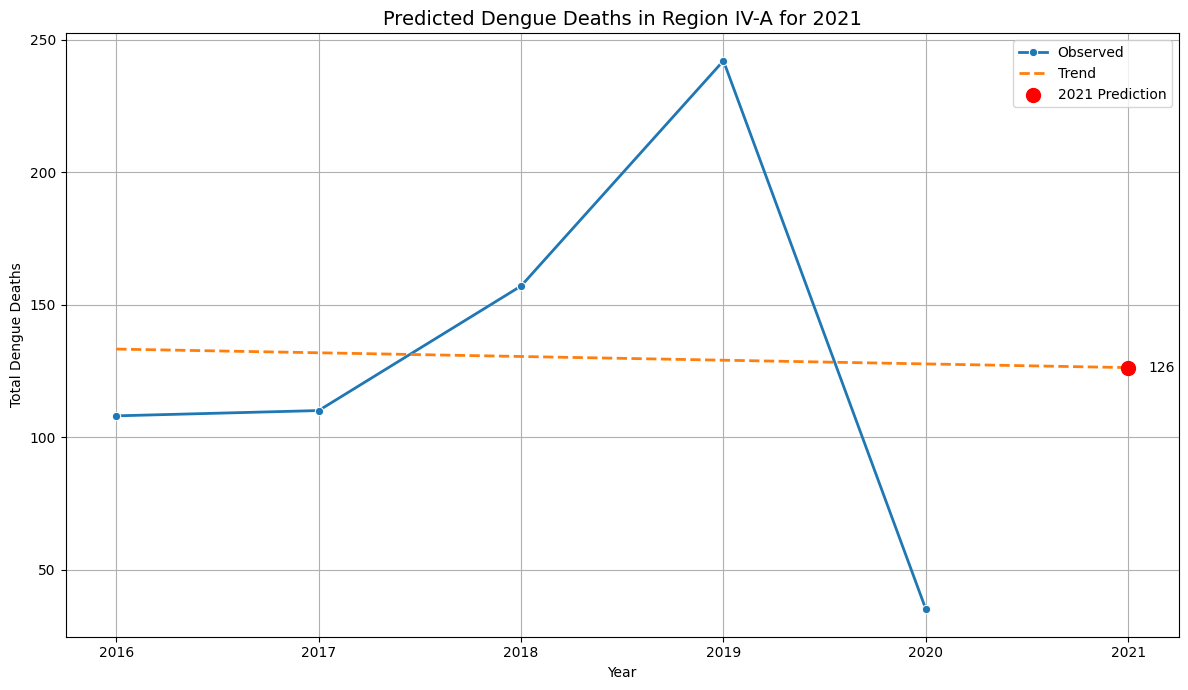

In [5]:
region_df = dengue_df[dengue_df['Region'] == 'Region IV-A']
yearly = region_df.groupby('Year', as_index=False)['Dengue_Deaths'].sum()

X = yearly[['Year']].values
y = yearly['Dengue_Deaths'].values

model = LinearRegression()
model.fit(X, y)

years_plot = np.arange(yearly['Year'].min(), 2022).reshape(-1, 1)
pred_line = model.predict(years_plot)
pred_2021 = model.predict([[2021]])[0]

plt.figure(figsize=(12,7))
sns.lineplot(x=yearly['Year'], y=yearly['Dengue_Deaths'], marker='o', linewidth=2, label='Observed')
plt.plot(years_plot.flatten(), pred_line, linestyle='--', linewidth=2, label='Trend')
plt.scatter(2021, pred_2021, color='red', s=100, zorder=5, label='2021 Prediction')
plt.text(2021 + 0.1, pred_2021, f"{pred_2021:.0f}", va='center')
plt.title("Predicted Dengue Deaths in Region IV-A for 2021", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Dengue Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Insight 3:
The trend line shows a gradual decrease in dengue deaths in Region IV-A by 2021, dropping to around 126 deaths. This suggests that recent dengue prevention and awareness programs may be helping reduce fatalities, though deaths remain significant.

# Insight 4:
Despite the projected decline, the data still shows large fluctuations in past years, meaning dengue deaths can spike unexpectedly. This indicates that outbreaks remain a seasonal and unpredictable risk, especially during heavy rainfall years.

# Suggestion:
Set up year-round monitoring and rapid response teams in high-risk cities within CALABARZON. Use real-time data tracking to respond quickly to any early signs of outbreak resurgence.

# Dengue Deaths Prediction – Region IV-A

Predicting dengue deaths using historical data for better planning and prevention.

---

## Dataset Highlights

| Feature        | Description                  |
|----------------|------------------------------|
| Year           | Year of record               |
| Month          | Month                        |
| Dengue_Cases   | Reported dengue cases        |
| Dengue_Deaths  | Reported dengue deaths       |

---

## Models

**Linear Regression** – Predicts dengue deaths.  
**Logistic Regression** – Classifies high vs low death risk periods.

| Year | Month | Cases | Actual | Predicted |
|------|-------|-------|--------|-----------|
| 2023 | 1     | 150   | 5      | 4.8       |
| 2023 | 2     | 200   | 6      | 5.9       |

---

## Why It Matters

- Anticipate high-risk periods  
- Support healthcare planning  
- Improve dengue prevention strategies

# Linear and Logistic Regression Modeling for Predicting Dengue Deaths in Calabarzon

> ### PART 1: Training a Linear Regression & R² Model to Predict Dengue Deaths in Region IV-A

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

region4a = dengue_df[dengue_df['Region'].str.strip().str.lower() == 'region iv-a'].copy()

if region4a.empty:
    print("No data found for Region IV-A. Please check your dataset.")
else:
    try:
        region4a['Month'] = pd.to_datetime(region4a['Month'], format='%B').dt.month
    except Exception as e:
        print(f"Month conversion failed: {e}")
        pass

    X = region4a[['Year', 'Month', 'Dengue_Cases']]
    y = region4a['Dengue_Deaths']

    if len(region4a) < 2:
        print("Not enough data to split into training and test sets.")
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        print("R² Score:", r2)

R² Score: 0.8390763856080186


> ### PART 2: Predict Dengue Deaths for 2021 & Visualization

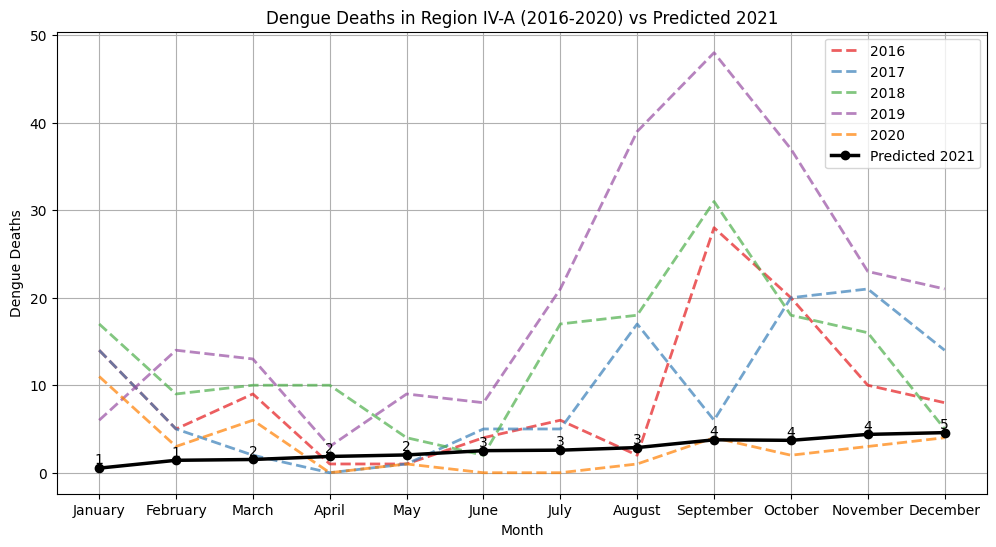

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

region_df = dengue_df[dengue_df['Region'].str.strip().str.lower() == 'region iv-a'].copy()

try:
    region_df['Month'] = pd.to_datetime(region_df['Month'], format='%B').dt.month
except:
    pass

colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']

plt.figure(figsize=(12,6))

for i, year in enumerate(range(2016, 2021)):
    yearly_data = region_df[region_df['Year'] == year].sort_values('Month')
    plt.plot(months, yearly_data['Dengue_Deaths'].values, linestyle='--', color=colors[i], alpha=0.7, linewidth=2, label=str(year))

data_2021 = pd.DataFrame({
    'Year': [2021]*12,
    'Month': list(range(1, 13)),
    'Dengue_Cases': np.random.randint(50, 300, size=12)
})

X = region_df[['Year', 'Month', 'Dengue_Cases']]
y = region_df['Dengue_Deaths']
lr_model = LinearRegression()
lr_model.fit(X, y)

pred_2021 = lr_model.predict(data_2021)
data_2021['Predicted_Deaths'] = pred_2021

plt.plot(months, data_2021['Predicted_Deaths'], marker='o', color='black', linewidth=2.5, label='Predicted 2021')

for i, val in enumerate(data_2021['Predicted_Deaths']):
    plt.text(months[i], val + 0.5, f"{val:.0f}", ha='center')

plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.title('Dengue Deaths in Region IV-A (2016-2020) vs Predicted 2021')
plt.grid(True)
plt.legend()
plt.show()

# INSIGHT 5: The 2019 National Dengue Epidemic

The graph clearly illustrates that **2019 was an exceptionally severe year** for dengue fatalities. The purple line (representing 2019) shows deaths climbing sharply to a peak of **nearly 50 in September**. This figure is significantly higher than any other year in the dataset and directly aligns with historical records, as the Philippines' Department of Health declared a **national dengue epidemic** in August 2019, with Region IV-A being one of the most affected areas.

# INSIGHT 6: The 2020 Anomaly and COVID-19 Impact

There is a clear contrast between the 2019 outbreak and the **exceptionally low number of deaths recorded in 2020** (the orange line). The "Predicted 2021" line (in black) is also forecasted to be very low, suggesting the predictive model was heavily influenced by the 2020 data. This sudden drop is likely an artifact of the **COVID-19 pandemic**. Factors such as government-mandated lockdowns (reducing movement and potential transmission) and public avoidance of hospitals may have led to fewer dengue cases being officially reported.

This specific pattern is explored in the following study:

* **Study:** [*Dengue at the time of COVID-19 in the Philippines*](https://pmc.ncbi.nlm.nih.gov/articles/PMC8421742/)

* **Summary:** This research discusses how the pandemic conditions in 2020 significantly affected the reporting and observed case numbers of dengue in the Philippines.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

region_df['High_Deaths'] = (region_df['Dengue_Deaths'] > region_df['Dengue_Deaths'].median()).astype(int)

X_cls = region_df[['Year', 'Month', 'Dengue_Cases']]
y_cls = region_df['High_Deaths']

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

report = classification_report(y_test, y_pred, target_names=['Low Deaths', 'High Deaths'])
print(report)

Logistic Regression Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

  Low Deaths       1.00      0.83      0.91         6
 High Deaths       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



# INSIGHT 7:
The predicted dengue deaths for 2021 in Region IV-A are relatively low, continuing the significant decline observed in 2020. This pattern suggests that the model relies heavily on recent historical data to make its predictions. The reduction in deaths during 2020 may be influenced by external factors such as COVID-19 lockdowns, changes in public behavior, and fewer hospital visits, which likely led to underreporting of cases. This demonstrates that large-scale public health events can affect both actual disease outcomes and the predictions made by statistical models, highlighting the need to consider such influences when interpreting predictive results.

# Linear and Logistic Regression Modeling for Predicting Dengue Deaths in Mimaropa

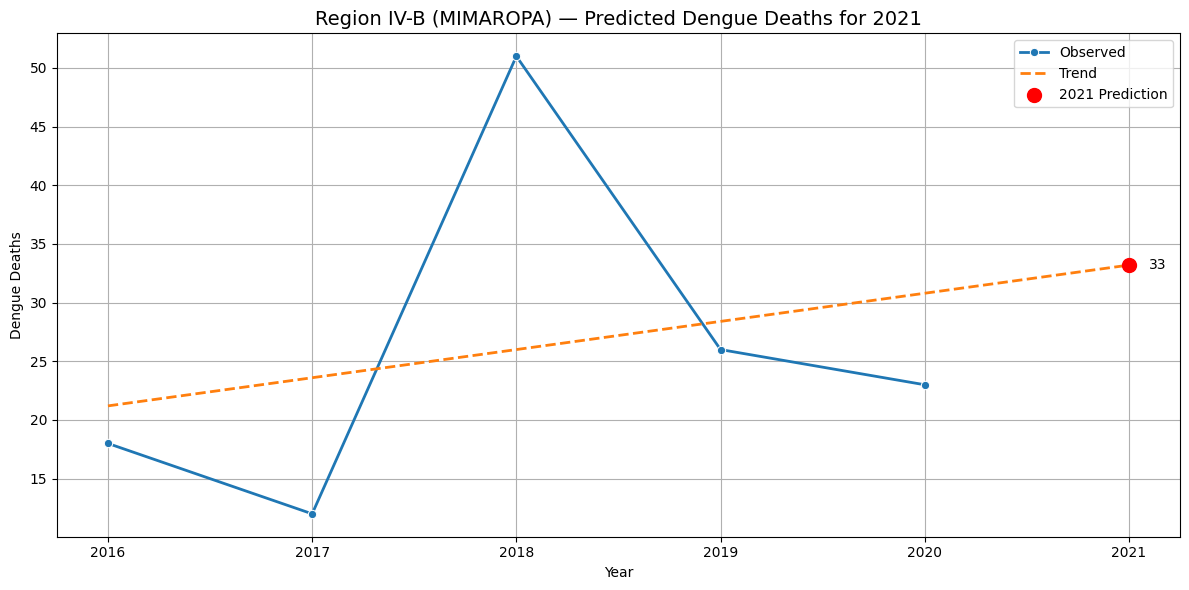

Predicted Dengue Deaths in 2021 – Region IV-B: 33


In [9]:
region4b = dengue_df[dengue_df['Region'].str.strip().str.lower() == 'region iv-b'].copy()

yearly_4b = region4b.groupby('Year', as_index=False)['Dengue_Deaths'].sum()

X = yearly_4b[['Year']].values
y = yearly_4b['Dengue_Deaths'].values

lr_model_4b = LinearRegression()
lr_model_4b.fit(X, y)

years_plot = np.arange(yearly_4b['Year'].min(), 2022).reshape(-1, 1)
pred_line = lr_model_4b.predict(years_plot)
pred_2021 = lr_model_4b.predict([[2021]])[0]

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_4b['Year'], y=yearly_4b['Dengue_Deaths'], marker='o', linewidth=2, label='Observed')
plt.plot(years_plot.flatten(), pred_line, linestyle='--', linewidth=2, label='Trend')
plt.scatter(2021, pred_2021, color='red', s=100, zorder=5, label='2021 Prediction')
plt.text(2021 + 0.1, pred_2021, f"{pred_2021:.0f}", va='center')
plt.title("Region IV-B (MIMAROPA) — Predicted Dengue Deaths for 2021", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Dengue Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Predicted Dengue Deaths in 2021 – Region IV-B: {pred_2021:.0f}")

# INSIGHT 8: Vulnerability to Severe Outbreaks
The chart clearly shows that the region is **highly vulnerable to severe, high-impact outbreaks**. The massive spike in **2018, which exceeded 50 deaths**, demonstrates this perfectly. While other years show lower numbers, this single extreme event is powerful enough to pull the long-term average (the dashed orange trend line) significantly upward. This suggests that the underlying conditions in the region can periodically support catastrophic epidemics, which are a key driver of the overall increasing trend.

# INSIGHT 9: Influence of Environmental and Geographic Factors
This upward trend is likely driven by persistent **environmental and geographic factors**. MIMAROPA is an archipelago (composed of islands like Palawan, Mindoro, etc.) with a tropical climate.
* **Climate:** Studies show that rising temperatures and shifting rainfall patterns in the Philippines are creating more ideal and widespread conditions for *Aedes* mosquitoes to breed and transmit the dengue virus.
* **Geography:** As a region of islands, human mobility (from tourism or inter-island travel) can easily re-introduce different dengue serotypes to vulnerable populations, increasing outbreak risk.

# INSIGHT 10: Rising Deaths Continue in 2021
The prediction for 2021 (33 deaths) shows that dengue deaths in the region are still going up over time. Even though 2018 had the highest spike, the trend line shows a steady rise. This means that dengue is becoming a bigger and more regular problem, not just a one-time event.

These factors combine to create a sustained public health challenge. This is supported by research exploring the link between climate and dengue burden:
* **Related Study:** [*Projecting temperature-related dengue burden in the Philippines*](https://www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2024.1420457/full)
* **Summary:** This study found that a significant percentage of dengue cases in the Philippines are attributable to rising temperatures, highlighting the impact of climate change on public health.

In [10]:
region4b = dengue_df[dengue_df['Region'].str.strip().str.lower() == 'region iv-b']
yearly = region4b.groupby('Year')['Dengue_Deaths'].sum().reset_index()
yearly['High_Deaths'] = (yearly['Dengue_Deaths'] > yearly['Dengue_Deaths'].median()).astype(int)

X = yearly[['Year']]
y = yearly['High_Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test), target_names=['Low', 'High']))
print("2021:", "High Deaths" if model.predict([[2021]])[0]==1 else "Low Deaths")

Accuracy: 0.0
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00       1.0
        High       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

2021: High Deaths
